### Pipeline gerarchica

**PIPELINE - APPROCCIO GERARCHICO**

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

Procedura:

```
Identificare sottografo motif (figure come la prima iterazione di un frattale)
Collassare il motif in un solo nodo
Aggiornare il peso e il colore degli archi
Riapplicare il procedimento al grafo risultante (nuovo livello)
```

In [1]:
import networkx as nx
import itertools
from grandiso import find_motifs

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

In [3]:
# grafo test di base G

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

#### Sottografo `motif`

In [4]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

In [5]:
# Sottografo motif da trovare nel grafo G: QUADRATO

# motif1 = nx.Graph()
# motif1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
# nx.draw(motif1)

In [6]:
#identify(motif1, G)

In [7]:
#GGG = contract_rename(G)

## TODO: definisci una serie di pattern
- singolo nodo
- due nodi e un arco
- triangolo aperto
- quadrato aperto
- combinazioni varie
- stelle
- curve frattali
- insieme di julia

In [5]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    risultato = [list(el) for el in lista3] 
    return risultato


In [6]:
ris = identify(motif, G)
ris

[[2, 4, 5], [4, 5, 6]]

In [7]:
nodi = list(G.nodes())
nodi

[1, 2, 3, 4, 5, 6]

In [8]:
#ris = identify(motif, G)
#nodi = list(G.nodes())
lun = len(nodi)
livello = 0

In [9]:
lista_temp = nodi[:]
for x in lista_temp:
    if x in ris[0]:
        print(x)
        lista_temp[x-1] = ris[0][0]
lista_temp

2
4
5


[1, 2, 3, 2, 2, 6]

In [10]:
liv_list = [livello for x in range(lun)]
lista_tuple = list(zip(liv_list, lista_temp))

In [11]:
liv_list

[0, 0, 0, 0, 0, 0]

In [12]:
lista_tuple

[(0, 1), (0, 2), (0, 3), (0, 2), (0, 2), (0, 6)]

In [13]:
mapping = dict(zip(nodi, lista_tuple))
mapping

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

[(0, 1), (0, 2), (0, 3), (0, 6)]


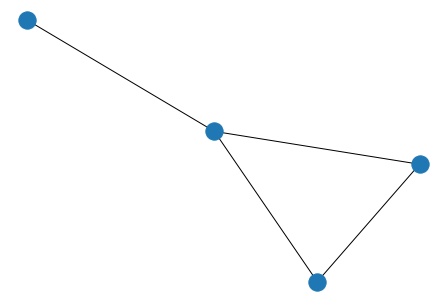

In [14]:
#mapping = {1: (1, 1), 2: (1, 2), 3: (1, 3), 4: (1, 2), 5: (1, 2), 6: (1, 6)}
G1 = nx.relabel_nodes(G, mapping)
print(G1.nodes())
nx.draw(G1)

# secondo giro

In [15]:
ris2 = identify(motif, G1)
ris2

[[(0, 2), (0, 3), (0, 6)]]

In [16]:
risini  = [val for sublist in ris2 for val in sublist]
risini 

[(0, 2), (0, 3), (0, 6)]

In [17]:
risini = [x[1] for x in risini]

In [18]:
risini

[2, 3, 6]

In [19]:
risini = [risini]
risini

[[2, 3, 6]]

In [20]:
risini

[[2, 3, 6]]

In [21]:
nodi2 = list(G1.nodes())
nodi2

[(0, 1), (0, 2), (0, 3), (0, 6)]

In [22]:
nodini = [x[1] for x in nodi2]
nodini

[1, 2, 3, 6]

In [45]:
#ris = identify(motif, G1)
#nodi = list(G1.nodes())
#lun = len(nodini)
#livello = 1

In [23]:
lun = len(nodini)
livello = 1

In [27]:
risini[0][2]

6

In [28]:
nodini

[1, 2, 3, 6]

In [29]:
risini[0]

[2, 3, 6]

In [30]:
lista_temp2 = nodini[:]
lista_temp2

[1, 2, 3, 6]

In [41]:
for x in lista_temp:
    if x in ris[0]:
        print(lista_temp[x-1])
        lista_temp[lun-1] = ris[0][0]
lista_temp

2
2
2


[1, 2, 3, 2, 2, 6]

In [42]:
for x in lista_temp2:
    if x in risini[0]:
        print(lista_temp2)
        lista_temp2[lun-1] = risini[0][0]
lista_temp2

[1, 2, 2, 2]
[1, 2, 2, 2]
[1, 2, 2, 2]


[1, 2, 2, 2]

In [127]:
for x in range(len(lista_temp2)):
    i = lista_temp2[x]
    #print(lista_temp2[x])
    if i in ris[0]:
        print(i)
        #print(lista_temp2[x-1])
        #lista_temp2[x] = risini[0][0]

lista_temp2

2
2
2


[[2, 3, 6], 2, 2, 2]

In [43]:
lista_temp2

[1, 2, 2, 2]

In [47]:
liv_list = [livello for x in range(lun)]
lista_tuple = list(zip(liv_list, lista_temp2))

In [48]:
nodini

[1, 2, 3, 6]

In [49]:
lista_tuple

[(1, 1), (1, 2), (1, 2), (1, 2)]

In [52]:
mapping2 = dict(zip(nodini, lista_tuple))
mapping2

{1: (1, 1), 2: (1, 2), 3: (1, 2), 6: (1, 2)}

In [60]:
edgini = list(G1.edges())
edgini

[((0, 1), (0, 2)),
 ((0, 2), (0, 3)),
 ((0, 2), (0, 2)),
 ((0, 2), (0, 6)),
 ((0, 3), (0, 6))]

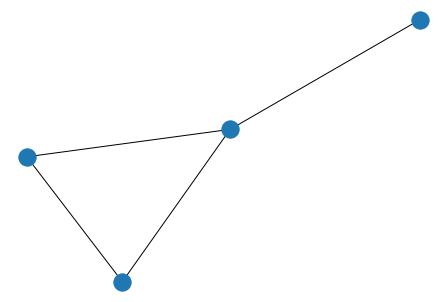

In [61]:
GPROVA = nx.Graph()
GPROVA.add_edges_from([(1, 2), (2, 3), (2, 6), ( 3, 6)])
nx.draw(GPROVA)

# AMEN

[(1, 1), (1, 2)]


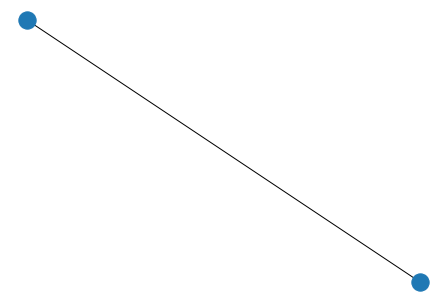

In [62]:
G2 = nx.relabel_nodes(GPROVA, mapping2)
print(G2.nodes())
nx.draw(G2)

## TODO: Collassare motif in un solo nodo rinominandolo

[(1, 1), (1, 2), (1, 3), (1, 6)]


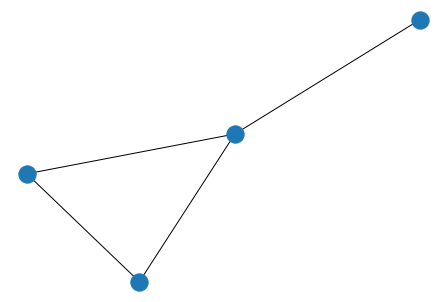

In [15]:
#non dovrebbe fun

def contract_rename(G, motif):
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    ris = [list(el) for el in lista3] 
    #ris = identify(motif1, G)
    nodi = list(G.nodes())
    lun = len(nodi)
    livello = 1
    liv_list = [livello for x in range(lun)]
    lista_temp = nodi[:]
    for x in lista_temp:
        if x in ris[0]:
            lista_temp[x-1] = ris[0][0]
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping1 = dict(zip(nodi, lista_tuple))
    # mapping = {1: (1, 1), 2: (1, 2), 3: (1, 3), 4: (1, 2), 5: (1, 2), 6: (1, 6)}
    MMM = nx.relabel_nodes(G, mapping1)
    print(MMM.nodes())
    nx.draw(MMM)
    return MMM


G1 = contract_rename(G, motif)

In [16]:
G2 = contract_rename(G1, motif)

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [11]:
def contract(G):
    ris = identify(motif, G)
    # a, b, c = ris[0][0], ris[0][1], ris[0][2]
    # M = nx.contracted_nodes(G, a, b)
    # MM = nx.contracted_nodes(M, a, c)
    mapping = {1: (1, 1), 2: (1, 2), 3: (1, 3), 4: (1, 2), 5: (1, 2), 6: (1, 6)}
    MMM = nx.relabel_nodes(G, mapping)
    print(MMM.nodes())
    # nx.draw(MMM)
    return MMM


G1 = contract(G)

[(1, 1), (1, 2), (1, 3), (1, 6)]


livello 1

In [31]:
G1 = contract(G)

[(1, 1), (1, 2), (1, 3), (1, 6)]


In [33]:
livello = 2

livello 2

In [12]:
# in un loop sarebbe meglio
G2 = contract(G1)

[(1, 1), (1, 2), (1, 3), (1, 6)]
